# **WALK RUN CLASSIFICATION**

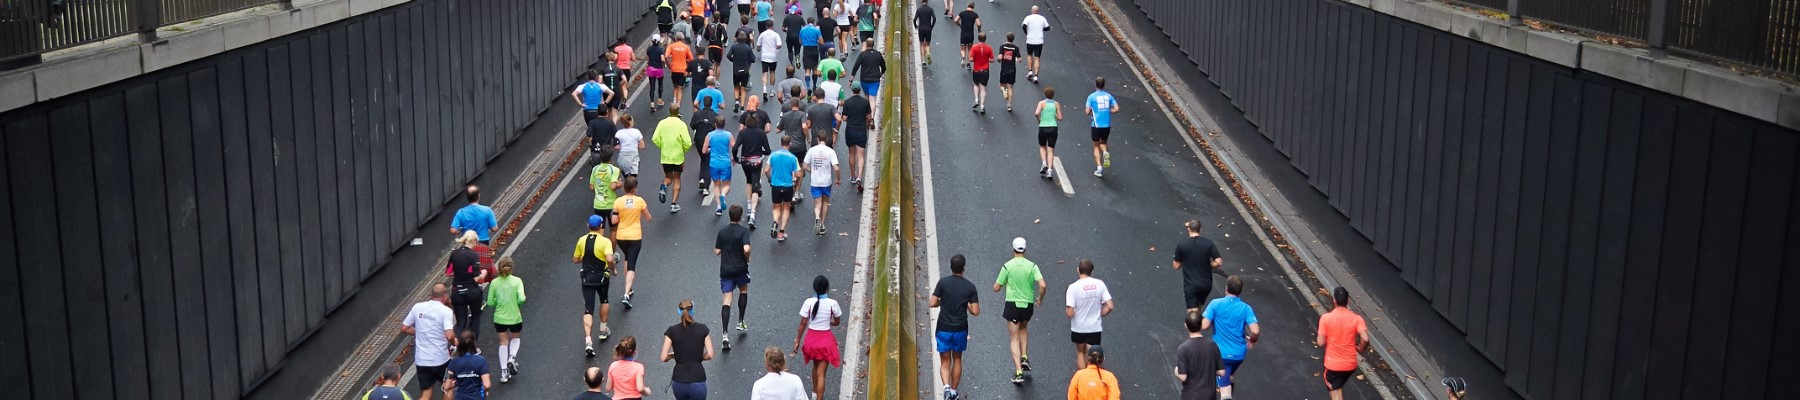

-------

# **BUSSINESS CASE**


_**To Create a predictive model to classify whether a person is running or walking based on the given predictor variables**_

_**IMPORTING ALL THE NECESSARY LIBRARIES**_

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statistics import mode
import itertools 
import os
import joblib
import pickle

# Suppress warnings
warnings.filterwarnings('ignore')

# Scipy
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy import stats

# Scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             r2_score, mean_absolute_error, mean_squared_error, 
                             precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc


# Other ML libraries
import lightgbm as lgb
import xgboost as xgb
from category_encoders import TargetEncoder

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (Dense, Conv1D, MaxPooling1D, Flatten, Dropout, 
                                     BatchNormalization, LSTM, GRU, Bidirectional)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

# Keras Tuner
from kerastuner import HyperModel, RandomSearch

# Plotting
from matplotlib.ticker import FormatStrFormatter

-----

_**LOAD DATA**_

In [2]:
data=pd.read_csv('walkrun.csv')

-----

## **DOMAIN ANALYSIS**

_Domain analysis is a critical step in any project, including a walking vs. running classification project based on the
provided data attributes. It involves gaining a deep understanding of the domain in which the project operates._ 

_**Domain Description**_:

- . **Domain**: _Human motion analysis and activity recognition using wearable sensors._  

- . **Context**: _The project aims to classify human activities (walking and running) based on sensor data collected 
    from wearable devices._    
    
- . **Key Stakeholders**: _Researchers, data scientists, fitness app developers, wearable device manufacturers._    

    
- . _**Data Attributes**_:  

- . 1) **Date and Time**: _These attributes provide the timestamp for each recorded data point. They may be useful for 
    analyzing patterns over time and establishing when the activities occurred._  

- . 2) **Username**: _Indicates the user associated with the data. It could be relevant for user-specific analysis or 
    personalized activity recommendations._  

- . 3) **Wrist**: _Specifies the wrist (left or right) where the wearable sensor was placed. This attribute can impact 
    the sensor data due to differences in motion patterns between wrists._  

- . 4) **Activity**:_The target variable, representing the activity being performed (walking or running). This is the 
    label you're trying to predict._

- . 5) **Acceleration (X, Y, Z)**: _These attributes provide acceleration data in three axes (X, Y, and Z). They are 
    crucial for understanding the movement patterns of walking and running._  

- . 6) **Gyroscope (X, Y, Z)**: _Gyroscope data captures angular velocity around the X, Y, and Z axes. It can help in 
    identifying the rotational aspects of activities._





-------

_**BASIC CHECKS**_

In [3]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
pd.set_option('display.max_column',None)

In [5]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [6]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [7]:
data.sample(5)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
67015,2017-7-6,16:10:42:817092001,viktor,0,0,0.2293,-1.3306,-0.3993,-0.2504,-0.3737,-0.4560
69754,2017-7-6,16:10:1:817952990,viktor,0,0,0.2666,-0.7919,-0.2353,1.1932,-0.1735,0.7325
38984,2017-7-16,15:43:23:794990003,viktor,1,0,-0.1821,-1.0992,-0.0582,-1.5723,1.0879,2.3817
68962,2017-7-6,16:7:20:217657983,viktor,0,0,0.2412,-1.1568,-0.2054,-1.3666,-1.1187,-0.7763
52660,2017-7-17,20:2:6:485374987,viktor,1,1,0.1997,0.6272,-0.1420,0.2331,-0.2105,1.3760


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [9]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


-  _"count" prints the number of rows excluding null values. As all of the above features have their count values the same as total rows, there are no null values._
-  _"wrist" and "activity" are nominal features._
-  _"wrist" refers to the hand on which the device was worn while recording, it can take only two values i.e., 0 for "left" and 1 for "right"._  
-  _"activity" refers to the physical activity being performed during recording, 0 for "walk" and 1 for "run"._
-  _For binary variables, "mean" can give valuable information on skewness. Mean values of "wrist" and "activity" are roughly around 0.5 indicating the sample collection is not heavily skewed towards one of the values._  
-  _The remaining six features are (x,y,z) acceleration & orientation values measured by the device, and they are ratio features._  
-  _Percentile & mean values provide a decent understanding of the skewness for ratio features. If mean is closer to 25th or 75th percentiles more than 50th percentile, that indicates an underlying skewness in the distribution._  
-  _Quick glance tells us that "acceletation_y", "acceleration_z" have skewness in their distribution.
-  _In data visualization section, we'll look at the distributions of these features._

In [10]:
data.describe(include="O")#gives the data insights regarding categorical values/data

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [11]:
data.shape

(88588, 11)

In [12]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

_NO null values are present in the data set_

In [13]:
columns = list(data.columns)
print(columns)

['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']


In [14]:
data.ndim #gives the dimension of the dataframe

2

In [15]:
data['activity'].unique()

array([0, 1], dtype=int64)

In [16]:
print(data['activity'].value_counts())

activity
1    44365
0    44223
Name: count, dtype: int64


In [17]:
numeric_columns=['wrist','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']

In [18]:
numerical_data = data[numeric_columns]

numeric_data = numerical_data

In [19]:
numerical_data.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


---------

## **EXPLORATORY DATA ANALYSIS**

_IN EDA we basically understand our data by plotting graphs and analyze them on that basis which gives us a broad view of data and we can check outlier deviation and all the neccesary info for upcoming procedures so it is one of the important part of process we basically do three types of analysis as._

1). Univarient analysis

2). Bivarient Analysis and

3). Multivarient analysis

1).Univariate Analysis: In univariate analysis we get the unique labels of categorical features, as well as get the range & density of numbers.

2). Bivariate Analysis: In bivariate analysis we check the feature relationship with target veriable.

3). Multivariate Analysis: In multivariate Analysis check the relationship between two veriable with respect to the target veriable.

Library Used: Matplotlib & Seaborn


## **EDA**

_**UNIVARIENT ANALYSIS**_

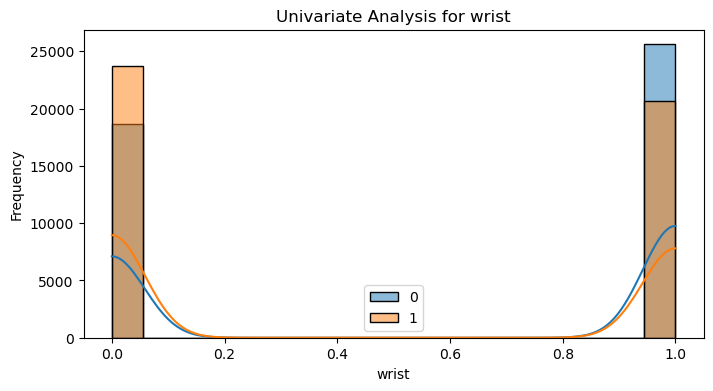

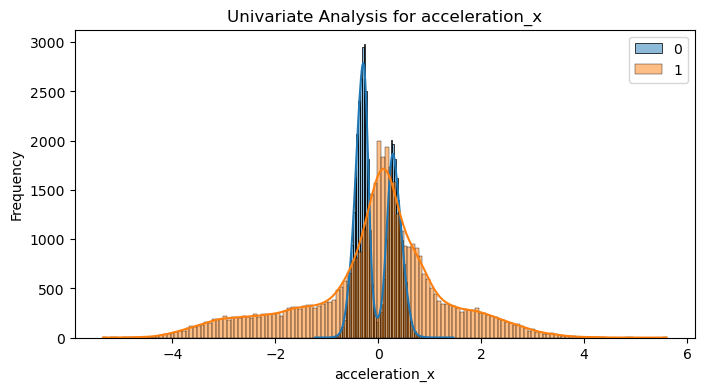

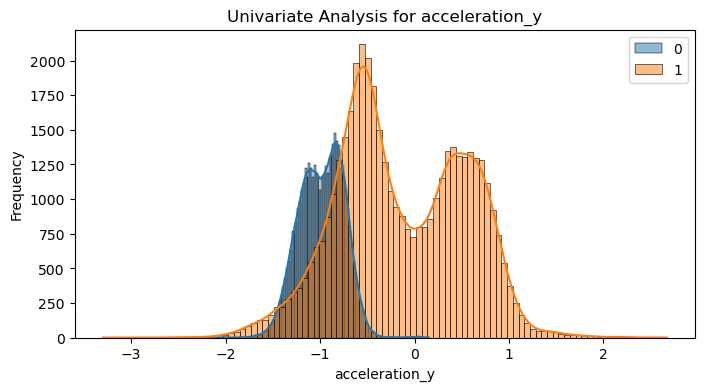

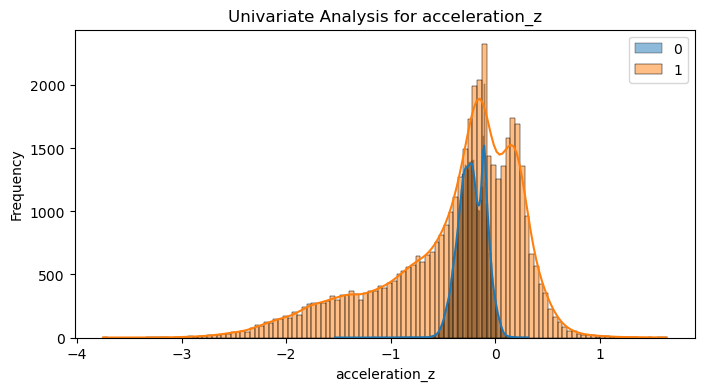

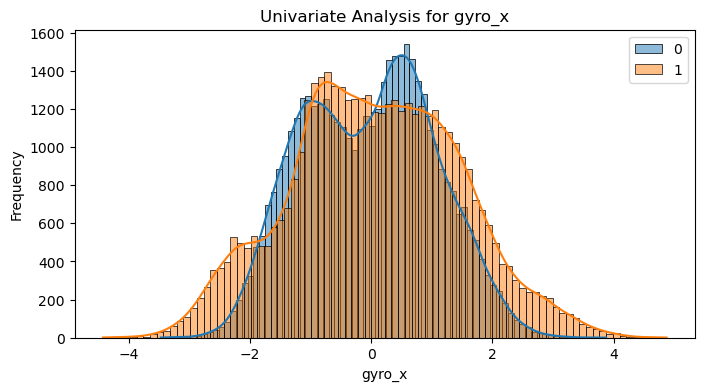

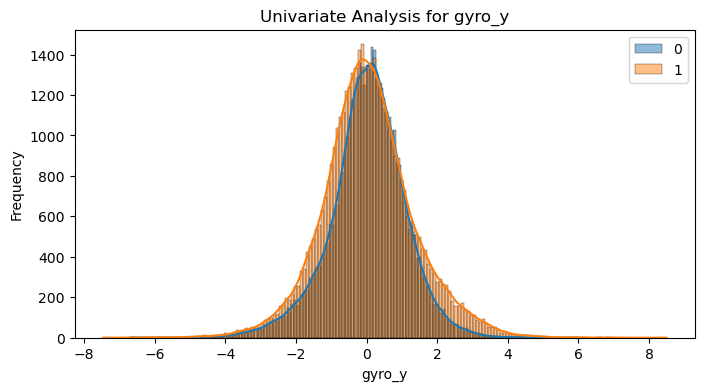

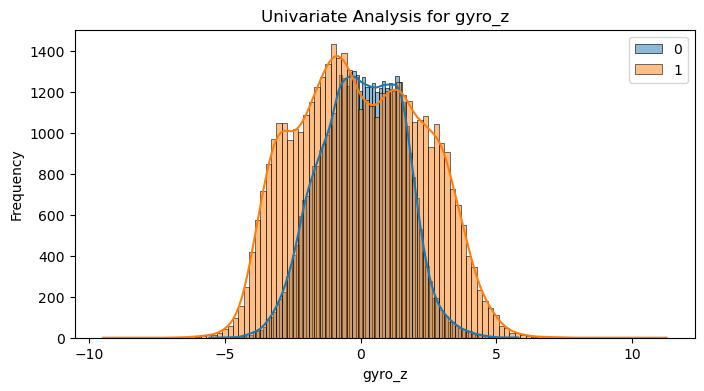

In [20]:
for feature in numerical_data:
    plt.figure(figsize=(8, 4))
    
    # Create a separate plot for each class (activity)
    for activity in data['activity'].unique():
        subset = data[data['activity'] == activity]
        sns.histplot(subset[feature], kde=True, label=activity)
    
    plt.title(f'Univariate Analysis for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.show()



_**INSIGHTS FROM UNIVARIENT ANALYSIS**_

_In this Blue represents the walking acitivity and orange represents the running activity based on the persons data_  
- **wrist**:- from the plotting we conclude there is skewness present the this data and at the middle there is no value and the data is skewed to the left side .  
- **acceleration_x**:- _from the graphical representation we can sya that orange graph i.e for running activity of a person is normally distributed where as walking is not and also 0.62 % data is left side skewed _  
- **acceleration_y**:- _from this graph it not properly distributed and continuosly overlapping and data is Right side skewed  0.91 value._  
- **acceleration_z**_:- _from this graph we can say that the graph is left side skewed_  
- **gyro_x**_:- _data is overlapping but we can say that it is not skwed.  
- **gyro_y**_:- _data is left side skewde.and minimum outliers are present.
- **gyro_z**_:- _data is having some outliers but evenly distributed not skewed to any of aside_  

CREATING DATE-TIME

In [21]:
data_date_reformat = data["date"].str.split("-", expand=True) #reformating date time column


data_time_reformat = data["time"].str.split(":", expand=True)

#to join we used concat function 
data_date_time_reformat = pd.concat([data_date_reformat, data_time_reformat], axis=1)
data_date_time_reformat.columns = ["year","month", "day", "hour", "minute", "second", "ns"] #rename columns

In [22]:
data_date_time_obj = pd.to_datetime(data_date_time_reformat)#creating an object

In [23]:
#add datetime object to a new dataframe and set it as index

data_sorted = data.copy()
data_sorted["datetime"] = data_date_time_obj
data_sorted.set_index("datetime", inplace=True)

In [24]:
data_sorted.drop(axis=1, columns=["username"], inplace=True) # droping username column

In [25]:
data_sorted

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-06-30 13:51:15.847724020,2017-6-30,13:51:15:847724020,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
2017-06-30 13:51:16.246945023,2017-6-30,13:51:16:246945023,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2017-06-30 13:51:16.446233987,2017-6-30,13:51:16:446233987,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
2017-06-30 13:51:16.646117985,2017-6-30,13:51:16:646117985,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
2017-06-30 13:51:16.846738994,2017-6-30,13:51:16:846738994,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...
2017-07-09 20:09:15.317911028,2017-7-9,20:9:15:317911028,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
2017-07-09 20:09:15.517889022,2017-7-9,20:9:15:517889022,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
2017-07-09 20:09:15.717828989,2017-7-9,20:9:15:717828989,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616


In [26]:
print("*** last row timestamp before sorting ***")
print(data_sorted.index[-1])
#sort df_sorted data by "datetime" index
data_sorted.sort_index(inplace=True)
print("*** last row timestamp after sorting ***")
print(data_sorted.index[-1])

*** last row timestamp before sorting ***
2017-07-09 20:09:16.117410004
*** last row timestamp after sorting ***
2017-07-17 20:16:03.684989988


 _As in Newly created dataframe "data_sorted" is sorted by datetime, and column username has been dropped. and it is better for visualization purpose_

In [27]:
data_sorted.head()

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-06-30 13:51:15.847724020,2017-6-30,13:51:15:847724020,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
2017-06-30 13:51:16.246945023,2017-6-30,13:51:16:246945023,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2017-06-30 13:51:16.446233987,2017-6-30,13:51:16:446233987,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
2017-06-30 13:51:16.646117985,2017-6-30,13:51:16:646117985,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
2017-06-30 13:51:16.846738994,2017-6-30,13:51:16:846738994,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [28]:
print("Start time of data recording ->", data_sorted.index.min())
print("End time of data recording ->", data_sorted.index.max())
print("Number of days of data collection ->", data_sorted.index.day.nunique())
print("Days of data collection ->", data_sorted.date.unique())

Start time of data recording -> 2017-06-30 13:51:15.847724020
End time of data recording -> 2017-07-17 20:16:03.684989988
Number of days of data collection -> 12
Days of data collection -> ['2017-6-30' '2017-7-1' '2017-7-2' '2017-7-4' '2017-7-6' '2017-7-7'
 '2017-7-9' '2017-7-10' '2017-7-11' '2017-7-15' '2017-7-16' '2017-7-17']


_Data was collected on 12 days printed above between June 30, 2017 and July 17, 2017_

-----

_**DATE- TIME FEATURE COLUMN ANALYSIS**_

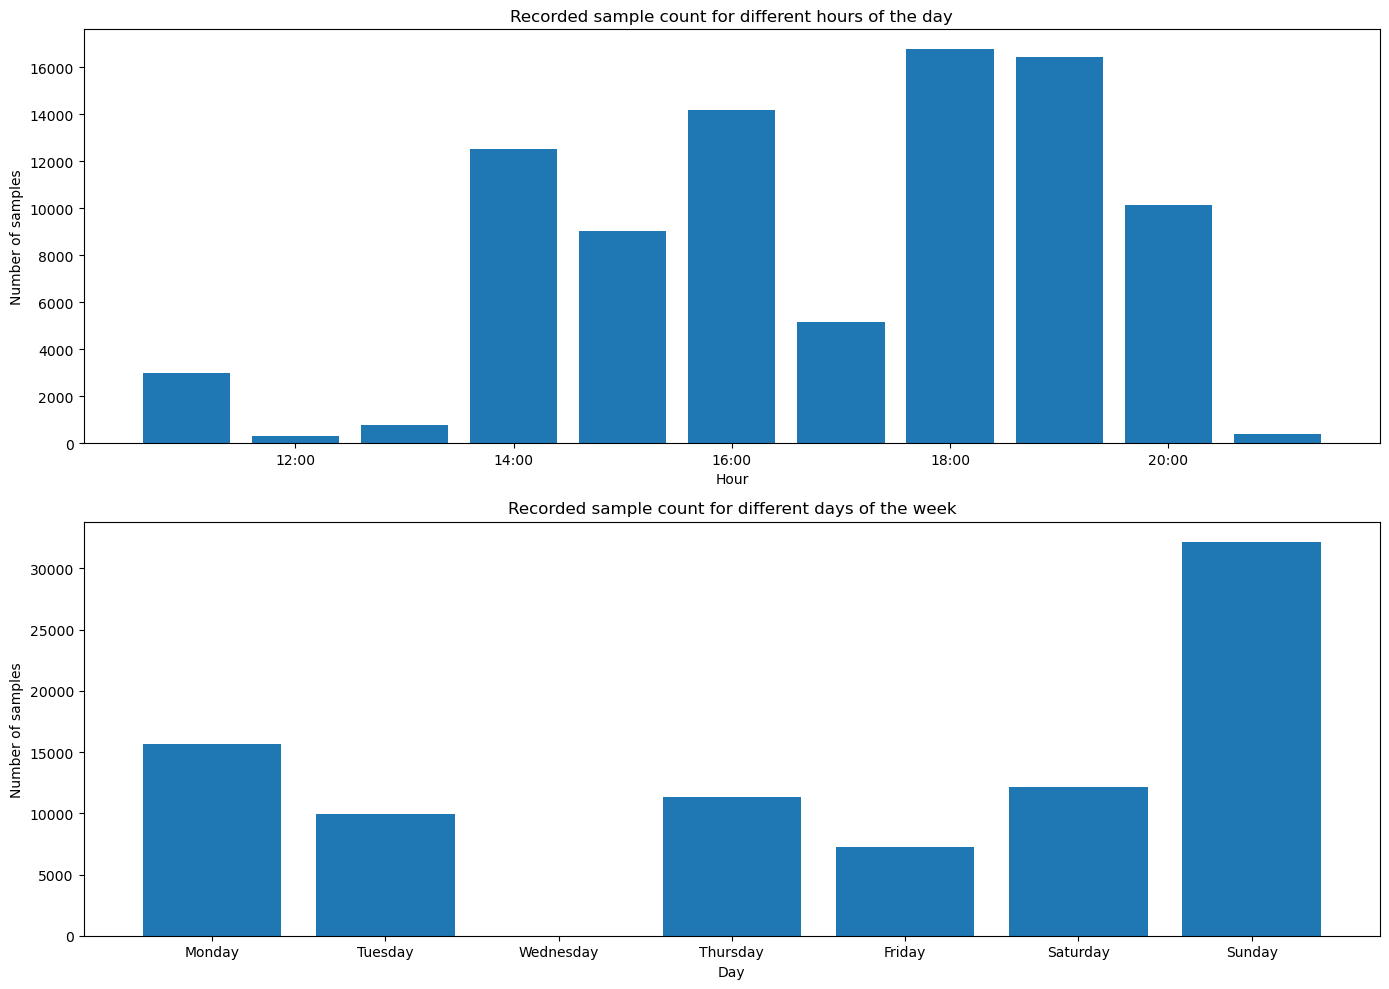

In [29]:
#visualization of user activity pattern
f, ax =  plt.subplots(ncols=1, nrows=2, figsize = (14,10))

#sample count vs hour of day
arr_hr = np.unique(data_sorted.index.hour, return_counts = True)
ax[0].bar(arr_hr[0], arr_hr[1])
ax[0].set_title("Recorded sample count for different hours of the day")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Number of samples")
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%d:00'))

#sample count vs day of week
arr_day = np.unique(data_sorted.index.dayofweek, return_counts = True)
ax[1].bar(arr_day[0], arr_day[1])
ax[1].set_title("Recorded sample count for different days of the week")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Number of samples")
ax[1].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

f.tight_layout()
f.show()

_**INSIGHTS**_

- _Hours of day: Most of the samples were recorded between 2pm and 8pm with the highest count coming from 6pm. The dip in sample count at 5pm looks out of place and worth noting._
- _Days of week: Sunday dominates the sample count which could be due to it being no work day. Rest of the days have similar sample counts except for Wednesday which has zero._

_**WRIST AND ACTIVITY ANALYSIS**_

In [30]:
#temporary dataframe with "wrist" and "activity" column values replaced
data_sorted_viz =  data_sorted.copy()
data_sorted_viz["wrist"].replace(to_replace={0:"left", 1:"right"}, inplace=True)
data_sorted_viz["activity"].replace(to_replace={0:"walk", 1:"run"}, inplace=True)
#sanity check to see if values were updated correctly
print("Updated unique values")
for each_col in ["wrist", "activity"]:
    print(each_col,":", data_sorted_viz[each_col].unique())
data_sorted_viz.head(1)

Updated unique values
wrist : ['left' 'right']
activity : ['walk' 'run']


,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
datetime,,,,,,,,,,
2017-06-30 13:51:15.847724020,2017-6-30,13:51:15:847724020,left,walk,0.265,-0.7814,-0.0076,-0.059,0.0325,-2.9296


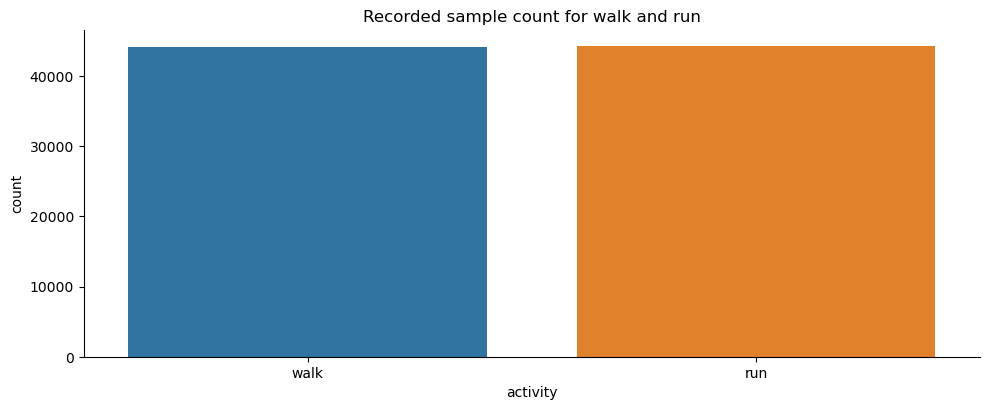

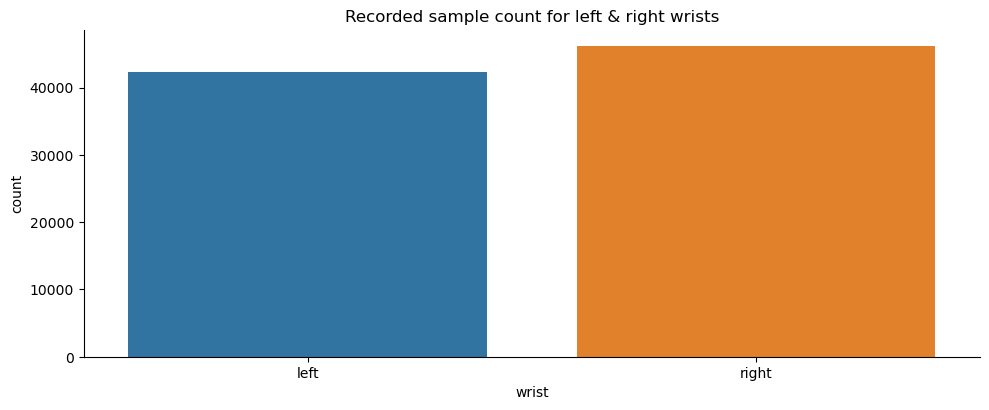

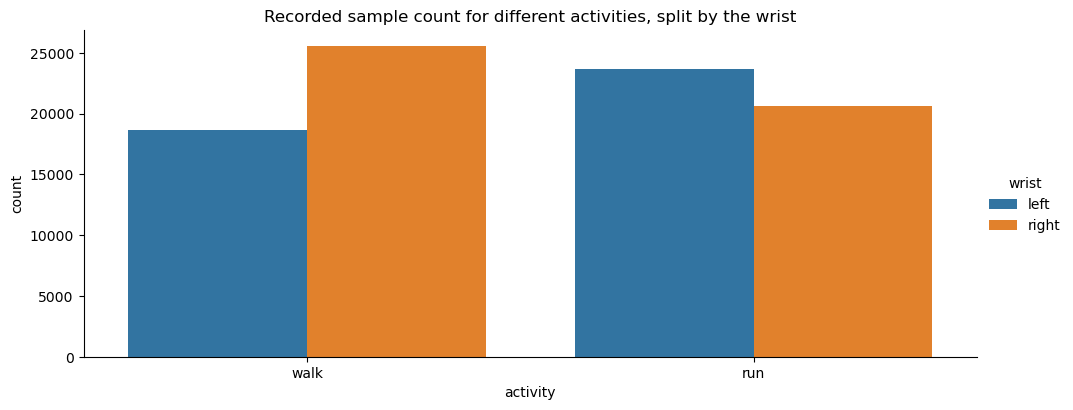

In [31]:
#visualizing counts of "activity" and "wrist" features
plt_ht = 4
plt_asp = 2.5
#first plot
g_act = sns.catplot(x = "activity", kind = "count", height = plt_ht, aspect = plt_asp, data=data_sorted_viz)
g_act.ax.set_title("Recorded sample count for walk and run")
#second plot
g_wrist = sns.catplot(x = "wrist", kind = "count", height =plt_ht, aspect = plt_asp, data=data_sorted_viz)
g_wrist.ax.set_title("Recorded sample count for left & right wrists")
#third plot
g_act_wri = sns.catplot(x = "activity", kind="count", hue = "wrist", height = plt_ht, aspect = plt_asp, data=data_sorted_viz)
g_act_wri.ax.set_title("Recorded sample count for different activities, split by the wrist")
plt.show()

- _Here we have createed a temporary dataframe by replacing "wrist" column values (0 with "left" and 1 with "right") and "activity" column values (0 with "walk" and 1 with "run") as it helps make the charts more intuitive._

- _Distribution is roughly even for different "activity", "wrist" values, maybe a bit skewed towards right wrist but not by much._
- _The third chart above illustrates that for walk we have more samples for right wrist and vice-versa for run._

_**DISTRIBUTION PLOTS OF ACCELEROMETER AND GYROSCOPE DATA**_

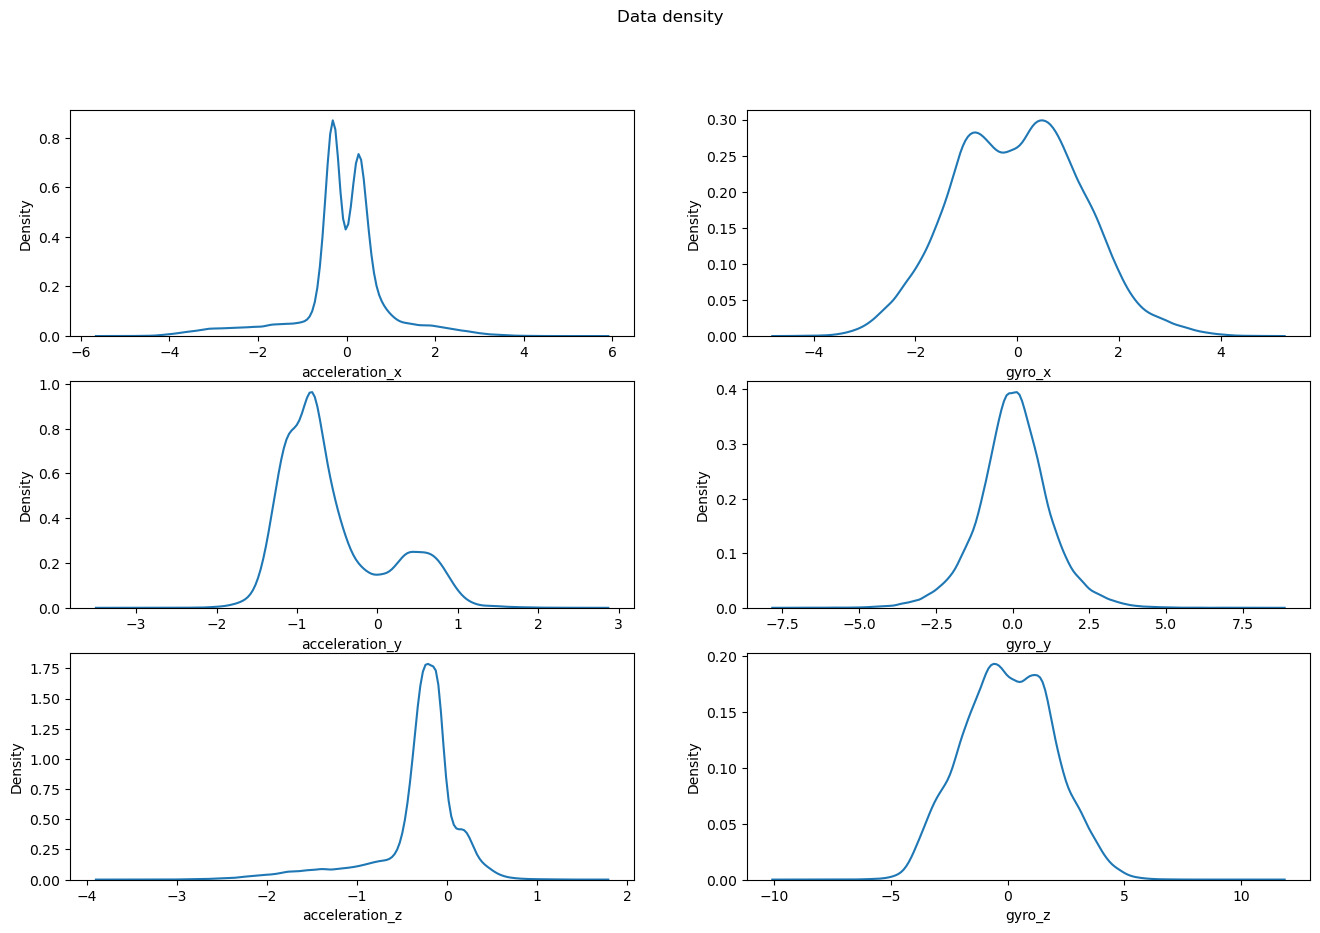

In [32]:
fig_kde, ax_kde = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
ax_num = 0
for each_col in data.columns.values[5:11]:
    g_kde = sns.kdeplot(data_sorted_viz[each_col], ax=ax_kde[ax_num % 3][ax_num // 3])
    ax_num += 1
fig_kde.suptitle("Data density")
#fig_kde.tight_layout()
fig_kde.show()

- _For x-axis, accelerometer data is roughly symmetric and the double peak pattern is because of two "wrist" values. Same behavior is noticed in gyroscope data._
- _For y-axis, gyroscope data has normal distribution with mean = 0. Accelerometer data on the other hand looks skewed, and has the most inconsistent distribution among all the ratio features._
- _For z-axis, gyroscope data looks symmetric. Accelerometer data is slightly skewed but not as much as y-axis data._

-------

_**VISUALIZING ACTIVITY SPLIT ACCELEROMETER AND GYROSCOPE DATA**_

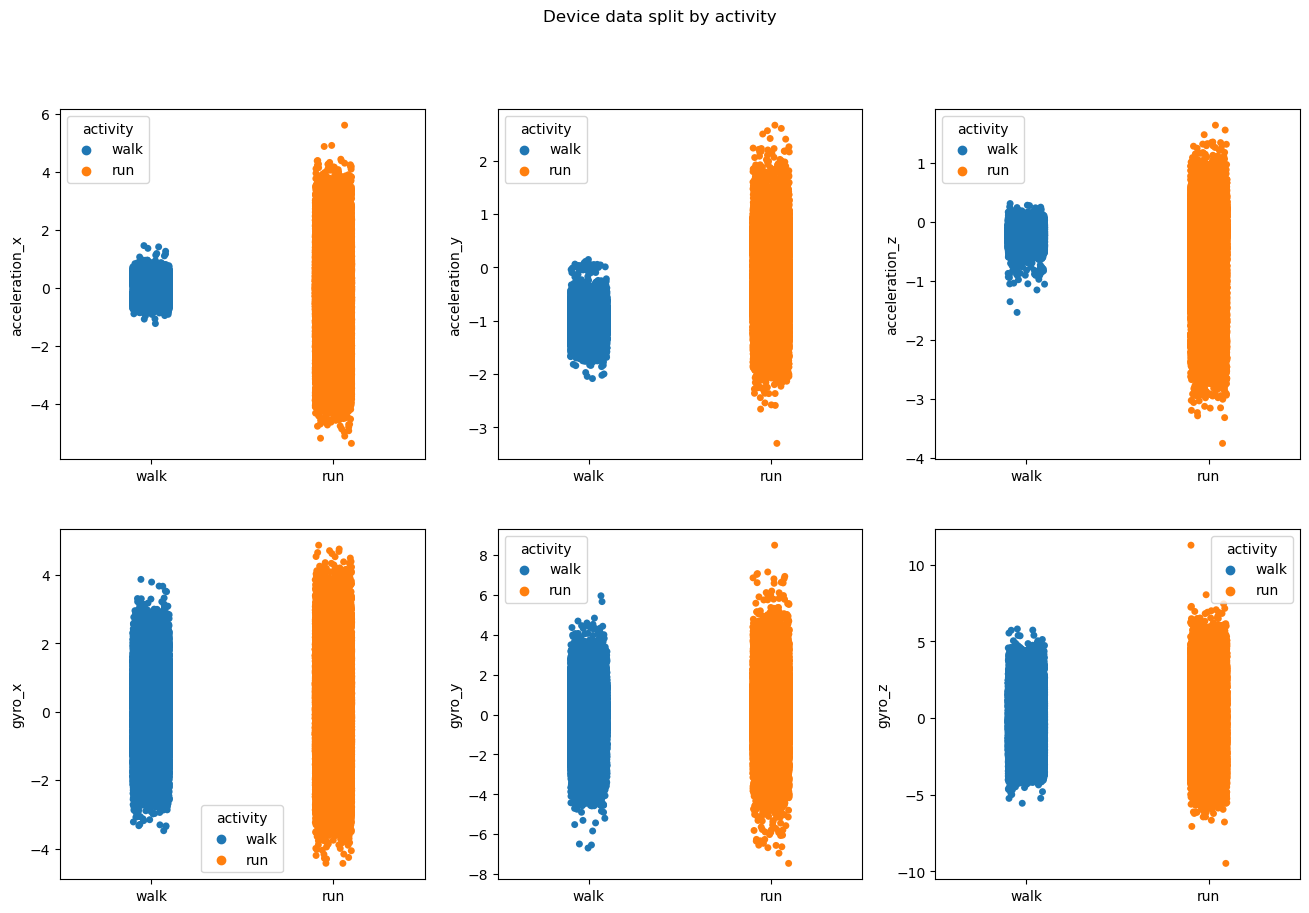

In [33]:
fig_str, ax_str = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig_str.suptitle("Device data split by activity")    
ax_num = 0
for each_col in data.columns.values[5:11]:
    g_str = sns.stripplot(x = "activity", y = each_col, hue = "activity", ax=ax_str[ax_num // 3][ax_num % 3], data = data_sorted_viz)
    ax_num += 1
    g_str.set_xlabel("")
#fig_str.tight_layout()
fig_str.show()

- _"acceleration_x", "acceleration_z" show clear differentiation between walking and running, with running yielding much higher(+ve, -ve based on the wrist) values._  
- _"acceleration_y" shows some separation but not as pronounced as the two other dimensions._  
- _"gyroscope" data on the other hand look quite similar for walking and running._
- _For predictive analysis, acceleration_x could be the most important feature because of it's data distribution quality and ability to differentiate "activity". Although acceleration_x, acceleration_z do show sepration, they suffer from some inconsistencies in data distribution which might hamper their prominence. It'll be interesting to see the effects of gyroscope data._


<div style="background-color:#F5F5F5 ; padding:10px">
<h3>CHECKING OUTLIERS</h3>
</div>

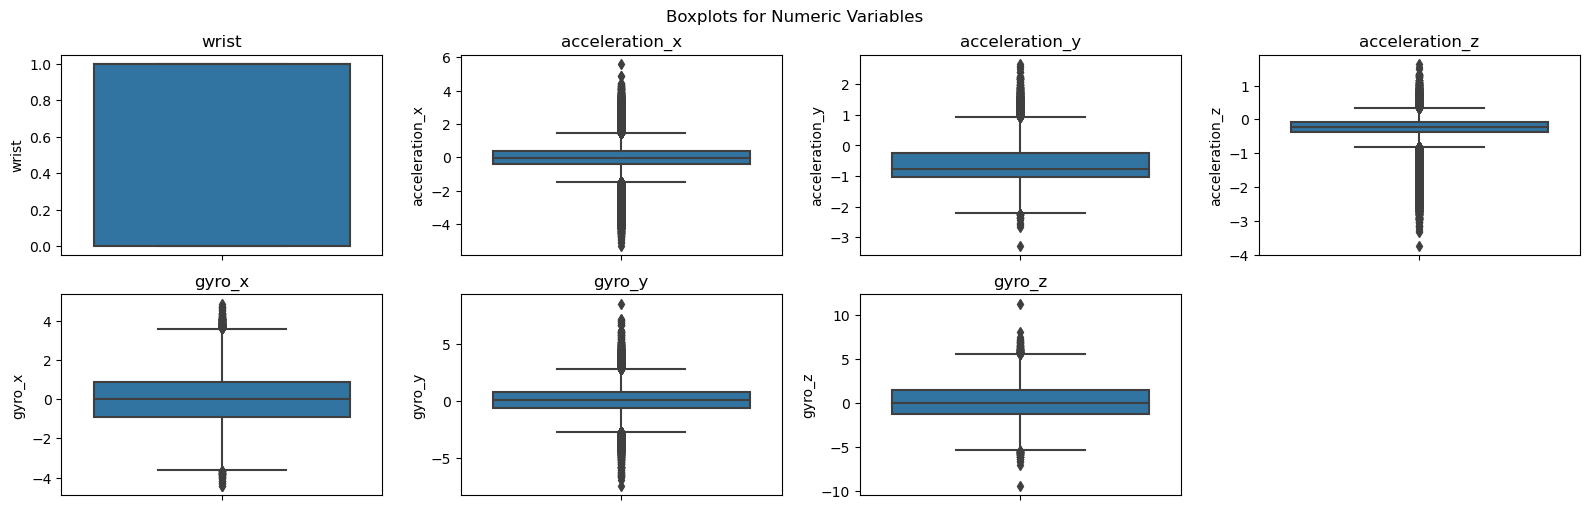

In [34]:
# Create subplots
plt.figure(figsize=(16, 10))
plt.suptitle("Boxplots for Numeric Variables")

for i, column in enumerate(numerical_data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

_**Handling outliers in a project like a walking vs. running classification task is crucial because outliers can negatively impact the performance of your machine learning model. Becuase of this we will predict based on the original one only**_

### **CHECKING SKEWNESS**


In [35]:
# Calculate skewness for each numeric variable
skewness_results = {}

for column in numerical_data.columns:
    skewness = stats.skew(data[column])
    skewness_results[column] = skewness

# Display the skewness results
for column, skewness in skewness_results.items():
    print(f"{column}: Skewness = {skewness:.2f}")

wrist: Skewness = -0.09
acceleration_x: Skewness = -0.62
acceleration_y: Skewness = 0.91
acceleration_z: Skewness = -1.84
gyro_x: Skewness = 0.07
gyro_y: Skewness = -0.02
gyro_z: Skewness = 0.04


_**BEFORE CHECKING SKEWNESS**_

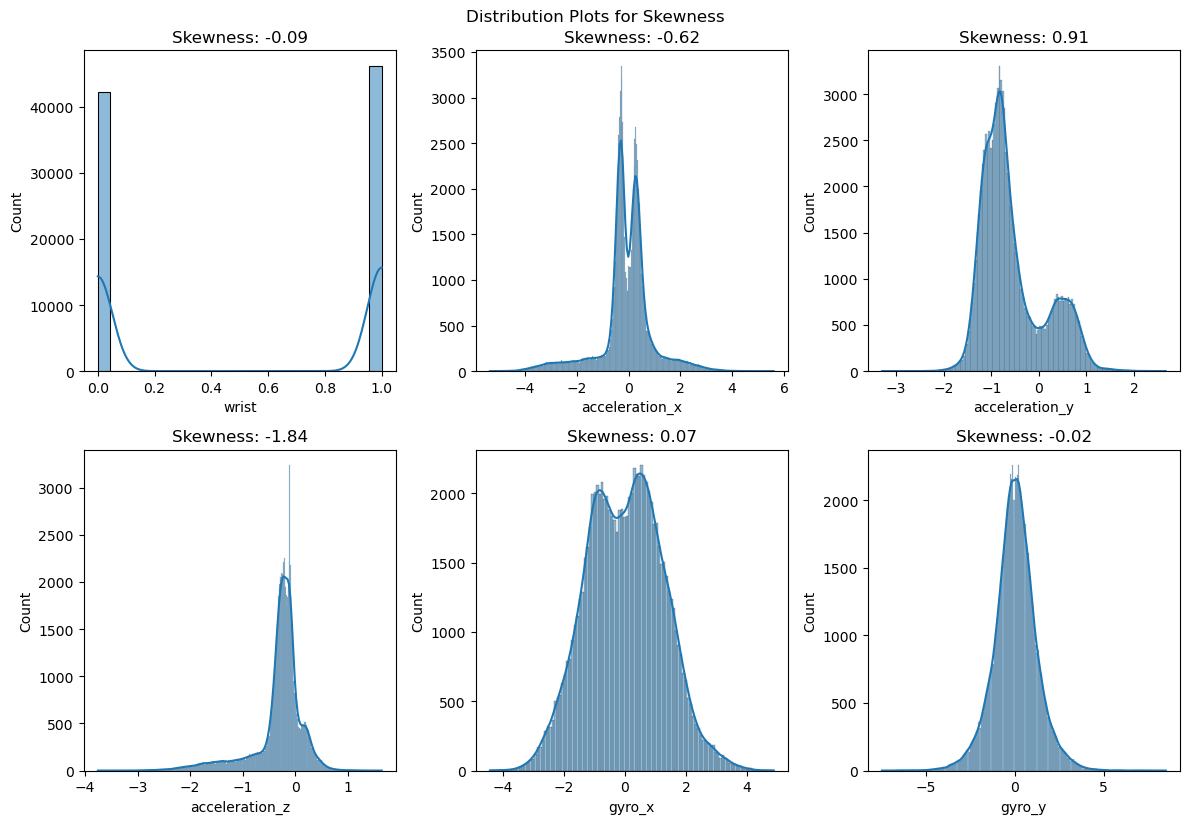

In [36]:
# Determine the number of subplots and rows
num_plots = len(numerical_data.columns)
num_rows = (num_plots + 2) // 3  # Adjust the number of rows as needed

# Create subplots for each numeric variable (up to 6 subplots)
plt.figure(figsize=(12, 4 * num_rows))
plt.suptitle("Distribution Plots for Skewness")

for i, column in enumerate(numerical_data.columns[:6]):  # Limit to 6 subplots
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data[column], kde=True)  # Create a distribution plot with KDE
    plt.title(f"Skewness: {data[column].skew():.2f}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [37]:
# Store skewness values before transformation
skewness_before = {}

# Apply skewness reduction techniques to each numeric data
for feature in numerical_data:
    # Calculate skewness before transformation
    skewness_before[feature] = data[feature].skew()
    
    # Apply cube root transformation (you can choose other methods as well)
    data[feature] = np.cbrt(data[feature])

# Store skewness values after transformation
skewness_after = {feature: data[feature].skew()for feature in numerical_data}

_**GRAPH AFTER TRANSFORMING SKEWNESS**_

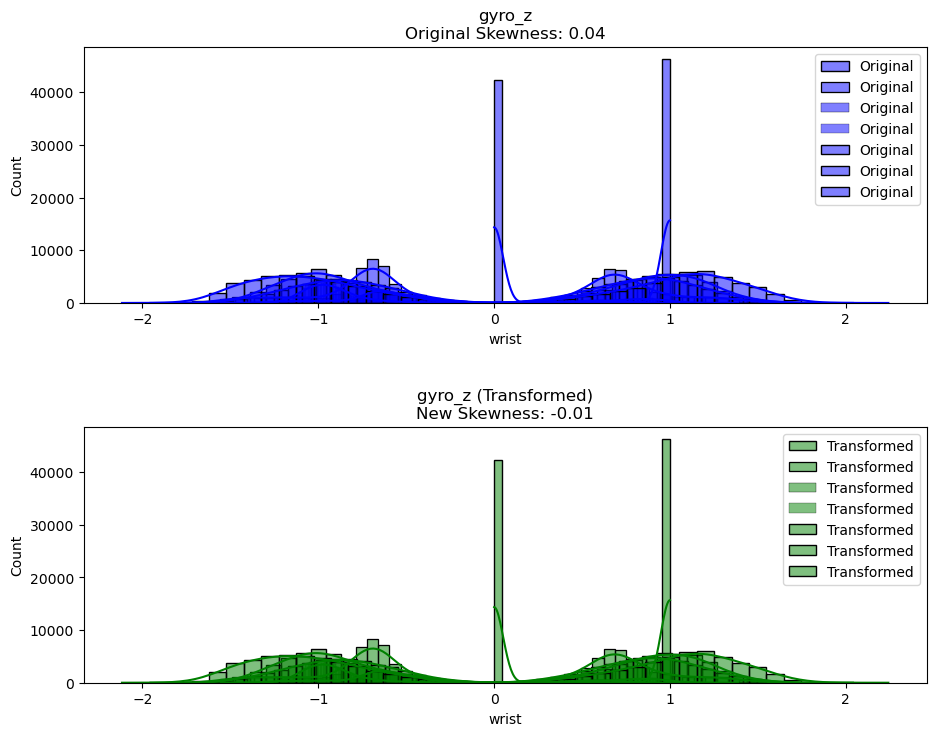

In [38]:
plt.figure(figsize=(10, 8))  # Adjust figure size

for i, feature in enumerate(numeric_data):
    # Plot original data
    plt.subplot(2, 1, 1)
    sns.histplot(data[feature], kde=True, color='blue', label='Original')
    plt.title(f'{feature}\nOriginal Skewness: {skewness_before[feature]:.2f}')
    plt.legend()
    
    # Plot transformed data
    plt.subplot(2, 1, 2)
    sns.histplot(data[feature], kde=True, color='green', label='Transformed')
    plt.title(f'{feature} (Transformed)\nNew Skewness: {skewness_after[feature]:.2f}')
    plt.legend()

plt.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()

In [39]:
data = data.drop(["date", "time", "username"], axis=1)
data.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.0,0,0.642316,-0.921067,-0.196610,-0.389300,0.319125,-1.430879
1,0.0,0,0.875991,-1.039518,-0.616575,-0.560089,0.275014,0.502521
2,0.0,0,0.760533,-1.140040,0.416402,-0.969230,0.473708,-1.345656
3,0.0,0,0.671731,-0.933128,0.446140,0.493105,-0.742835,-1.431529
4,0.0,0,0.783734,-0.976520,0.329887,0.374919,0.759379,1.355796



### **SPLITTING DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [40]:
X = data.iloc[:, [0, 2, 3, 4, 5, 6, 7]]

In [41]:
X

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.0,0.642316,-0.921067,-0.196610,-0.389300,0.319125,-1.430879
1,0.0,0.875991,-1.039518,-0.616575,-0.560089,0.275014,0.502521
2,0.0,0.760533,-1.140040,0.416402,-0.969230,0.473708,-1.345656
3,0.0,0.671731,-0.933128,0.446140,0.493105,-0.742835,-1.431529
4,0.0,0.783734,-0.976520,0.329887,0.374919,0.759379,1.355796
...,...,...,...,...,...,...,...
88583,0.0,0.675624,-0.942639,-0.510063,0.784222,1.262520,0.845676
88584,0.0,0.792482,-1.000899,-0.760418,0.467538,-1.079081,-0.423768
88585,0.0,0.771216,-1.056124,-0.656309,-1.131851,-0.653590,-1.080539
88586,0.0,0.637431,-0.950305,-0.423396,-1.148896,0.769700,-1.210896


In [42]:
y = data.activity
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

## **SCALING**


- _Scaling is a preprocessing technique used in data analysis and machine learning to standardize or normalize the range of numerical features. It ensures that different features have similar scales, preventing some features from dominating others during modeling._
- _Here we used standardscalar for our scaling purpose.

In [43]:
s = StandardScaler()
X = s.fit_transform(X)

In [44]:
X

array([[-1.04536822,  0.83135504, -0.49557968, ..., -0.40301088,
         0.31056628, -1.27870498],
       [-1.04536822,  1.11486163, -0.66181083, ..., -0.5775245 ,
         0.26293233,  0.43974795],
       [-1.04536822,  0.97478213, -0.80288126, ..., -0.99558588,
         0.47749369, -1.20295698],
       ...,
       [-1.04536822,  0.98774393, -0.68511623, ..., -1.1617534 ,
        -0.73982453, -0.96731478],
       [-1.04536822,  0.82542864, -0.53661128, ..., -1.1791701 ,
         0.79712189, -1.08317917],
       [-1.04536822,  0.87669745, -0.5061896 , ...,  0.49638325,
         1.07557997,  0.95850351]])


### **CHECKING CORRELATION**


In [45]:
data.corr()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.807540,0.063299,0.210732,-0.012682,-0.051344,-0.006427
activity,-0.113404,1.000000,0.081035,0.588365,0.174461,0.023756,-0.017899,-0.021809
acceleration_x,-0.807540,0.081035,1.000000,-0.093445,-0.353242,-0.025319,0.025050,-0.009839
acceleration_y,0.063299,0.588365,-0.093445,1.000000,0.012223,-0.068630,0.070325,0.007605
acceleration_z,0.210732,0.174461,-0.353242,0.012223,1.000000,0.061175,-0.024131,0.007492
gyro_x,-0.012682,0.023756,-0.025319,-0.068630,0.061175,1.000000,0.037293,0.209513
gyro_y,-0.051344,-0.017899,0.025050,0.070325,-0.024131,0.037293,1.000000,0.315394
gyro_z,-0.006427,-0.021809,-0.009839,0.007605,0.007492,0.209513,0.315394,1.000000


In [46]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

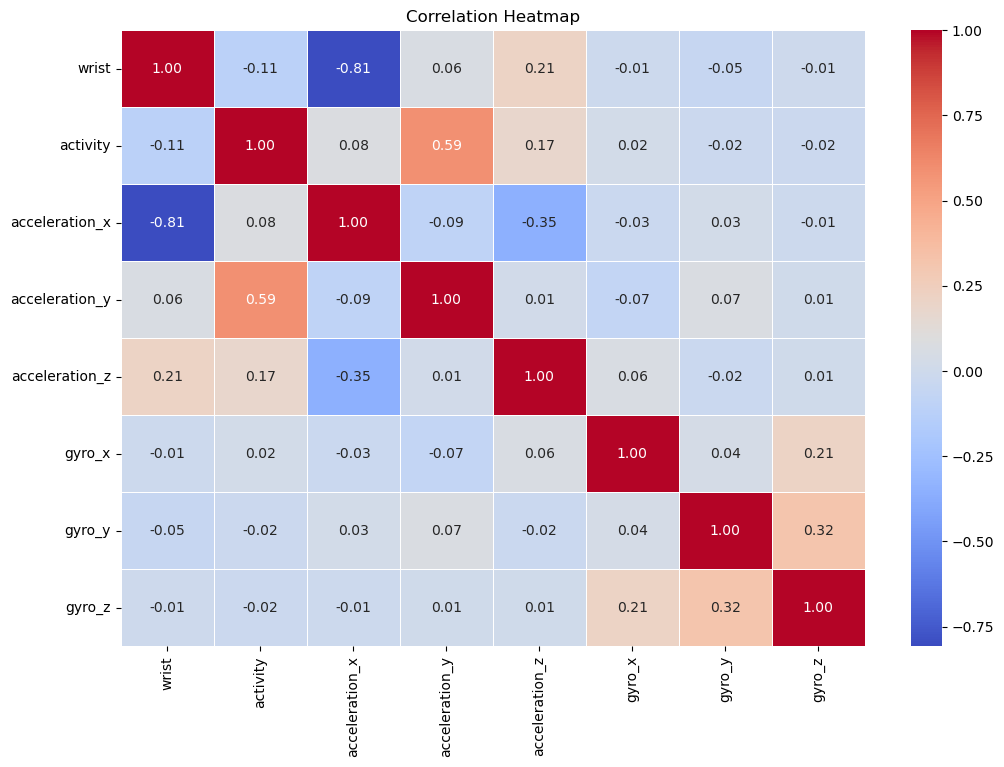

In [47]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

_Here we can say that there is only corelation in between acceleration_x and wrist but we are not going to drop it as it is needed for our model for prediction and not that much of changes will affect_


## **MODEL CREATION**

In [48]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

# Splitting train and test data

In [49]:
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10) 

In [50]:
x_train

array([[-1.04536822,  1.66994506, -0.62541233, ...,  0.60068033,
        -1.59073567,  1.44925217],
       [ 0.95660073, -1.23271677,  1.88597313, ...,  1.16523067,
        -0.67334269,  1.29524831],
       [-1.04536822,  0.92673682, -0.62682249, ...,  1.02979576,
         1.07216047,  0.97999569],
       ...,
       [ 0.95660073, -1.63646425,  0.36339754, ...,  1.07679277,
         1.06100343,  1.21331288],
       [ 0.95660073, -0.88646327,  1.94032029, ..., -1.34806181,
         0.85497447, -0.81146558],
       [-1.04536822,  1.40918654, -0.54969149, ...,  1.06179321,
        -1.17785009, -1.19442087]])

In [51]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((66441, 7), (22147, 7), (66441,), (22147,))


### **LOGISTIC REGRESSION**


In [52]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [53]:
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred_lor = logistic_reg.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_lor))

logistic_reg_acc = accuracy_score(y_test,y_pred_lor)
print(logistic_reg_acc )

[[10021  1019]
 [ 2154  8953]]
0.8567300311554612


In [56]:
accuracy_lor = accuracy_score(y_test,y_pred_lor)
print(accuracy_lor)
conf_matrix_lor = confusion_matrix(y_test, y_pred_lor)
print(conf_matrix_lor)
class_report_lor = classification_report(y_test, y_pred_lor)
print(class_report_lor)

0.8567300311554612
[[10021  1019]
 [ 2154  8953]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     11040
           1       0.90      0.81      0.85     11107

    accuracy                           0.86     22147
   macro avg       0.86      0.86      0.86     22147
weighted avg       0.86      0.86      0.86     22147



<Axes: >

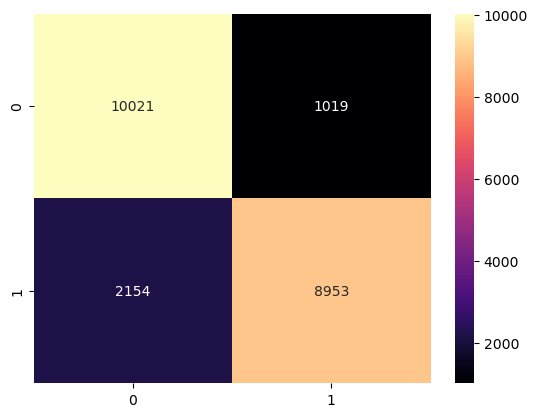

In [57]:
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(y_test,y_pred_lor)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')


### **DECISION TREE**


In [58]:
Desc_tree_class = DecisionTreeClassifier(random_state=42)

In [59]:
# Fit the model to the training data
Desc_tree_class.fit(x_train, y_train)

# Make predictions on the test data
y_pred_dt = Desc_tree_class.predict(x_test)

In [60]:
# Evaluate the model
decision_tree_accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)


# Print the model's performance metrics
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.98
Confusion Matrix:
 [[10859   181]
 [  179 10928]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     11040
           1       0.98      0.98      0.98     11107

    accuracy                           0.98     22147
   macro avg       0.98      0.98      0.98     22147
weighted avg       0.98      0.98      0.98     22147



In [61]:
print(decision_tree_accuracy)

0.9837449767462861


<Axes: >

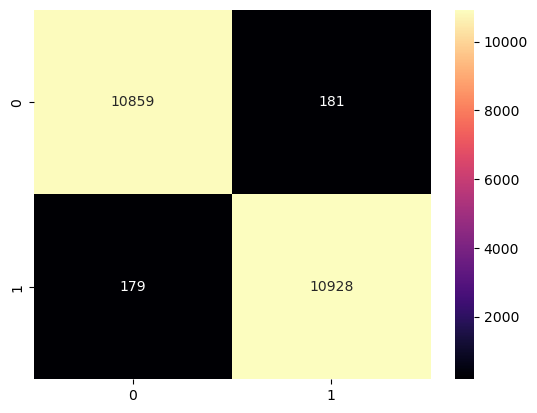

In [62]:
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(y_test,y_pred_dt)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')


### **RANDOM FOREST ALGORITHM**

In [63]:
# Create a Random Forest model
random_for_class = RandomForestClassifier(n_estimators=100, random_state=42)


In [64]:
# Fit the model to the training data
random_for_class.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [65]:
# Make predictions on the test data
y_pred_rm = random_for_class.predict(x_test)


In [66]:
# Evaluate the model
random_for_accuracy = accuracy_score(y_test, y_pred_rm)
conf_matrix = confusion_matrix(y_test, y_pred_rm)
class_report = classification_report(y_test, y_pred_rm)
accuracy = decision_tree_accuracy 
# Print the model's performance metrics
print(f"Accuracy: {random_for_accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.99
Confusion Matrix:
 [[10935   105]
 [   82 11025]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [67]:
print(random_for_accuracy)

0.9915564184765431



### **SUPPORT VECTOR CLASSIFIER**


In [68]:
# Create an SVM model
support_vec_class = SVC(kernel='linear', C=1.0, random_state=42)

In [69]:
# takes more computation time
  # Fit the model to the training data
support_vec_class.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [70]:
# Make predictions on the test data
y_pred_svc = support_vec_class.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
support_vec_accuracy = accuracy_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)


# Print the model's performance metrics
print(f"Accuracy: {support_vec_accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.87
Confusion Matrix:
 [[10450   590]
 [ 2340  8767]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88     11040
           1       0.94      0.79      0.86     11107

    accuracy                           0.87     22147
   macro avg       0.88      0.87      0.87     22147
weighted avg       0.88      0.87      0.87     22147



In [72]:
print(support_vec_accuracy)

0.867702171851718


<Axes: >

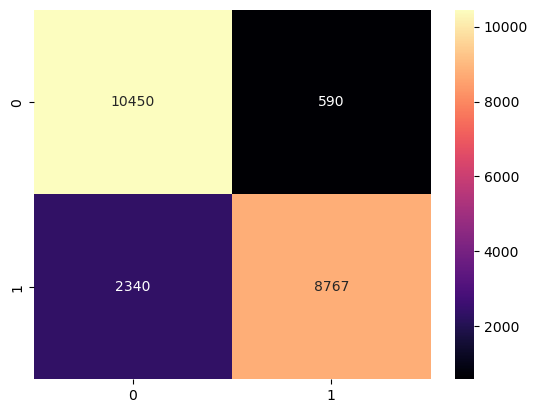

In [73]:
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(y_test,y_pred_svc)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')


### **XG BOOST ALGORITHM**


In [74]:
# Create an XGBoost model
xg_boost_class = xgb.XGBClassifier(objective='multi:softmax', num_classes=len(y.unique()), random_state=42)

In [75]:
# Create an XGBoost model with the correct num_class parameter
num_classes = len(y.unique())  # Get the number of unique classes in your target variable
xg_boost_class  = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=42)


In [76]:
# Fit the model to the training data
xg_boost_class.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [77]:
# Make predictions on the test data
y_pred_xg = xg_boost_class.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
xg_boost_accuracy = accuracy_score(y_test, y_pred_xg)
conf_matrix = confusion_matrix(y_test, y_pred_xg)
class_report = classification_report(y_test, y_pred_xg)

# Print the model's performance metrics
print(f"Accuracy: {xg_boost_accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.99
Confusion Matrix:
 [[10954    86]
 [   82 11025]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



In [79]:
print(xg_boost_accuracy)

0.9924143224816002


<Axes: >

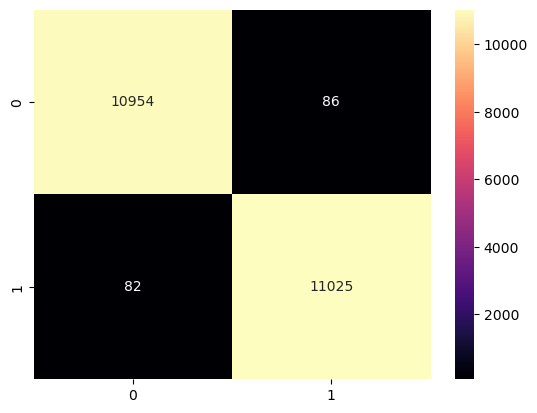

In [80]:
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(y_test,y_pred_xg)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')


### **CNN MODEL**


In [81]:
model = Sequential()
model.add(Dense(250, activation='relu', input_shape=(7,))) 
model.add(BatchNormalization())
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 250)                 │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 250)                 │           1,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,251 (12.70 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 500 (1.95 KB)

In [82]:
model.compile(loss = 'binary_crossentropy', optimizer = 'ADAM', metrics = ['accuracy'])

In [83]:
checkpoint = ModelCheckpoint("walk_run.keras", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             save_freq='epoch') 

early = EarlyStopping(monitor='val_accuracy', 
                      min_delta=0, 
                      patience=7, 
                      verbose=1, 
                      mode='auto')

In [84]:
history = model.fit(x_train, y_train, 
                    batch_size=1000, 
                    epochs=50, 
                    validation_split=0.2,
                    callbacks=[checkpoint, early],
                    verbose=2)

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.49861, saving model to walk_run.keras
54/54 - 2s - 36ms/step - accuracy: 0.8570 - loss: 0.3241 - val_accuracy: 0.4986 - val_loss: 0.5577
Epoch 2/50

Epoch 2: val_accuracy improved from 0.49861 to 0.50169, saving model to walk_run.keras
54/54 - 0s - 9ms/step - accuracy: 0.9640 - loss: 0.1127 - val_accuracy: 0.5017 - val_loss: 0.5088
Epoch 3/50

Epoch 3: val_accuracy improved from 0.50169 to 0.74219, saving model to walk_run.keras
54/54 - 1s - 10ms/step - accuracy: 0.9734 - loss: 0.0822 - val_accuracy: 0.7422 - val_loss: 0.4238
Epoch 4/50

Epoch 4: val_accuracy improved from 0.74219 to 0.87260, saving model to walk_run.keras
54/54 - 1s - 10ms/step - accuracy: 0.9780 - loss: 0.0675 - val_accuracy: 0.8726 - val_loss: 0.3221
Epoch 5/50

Epoch 5: val_accuracy improved from 0.87260 to 0.91805, saving model to walk_run.keras
54/54 - 1s - 9ms/step - accuracy: 0.9814 - loss: 0.0566 - val_accuracy: 0.9181 - val_loss: 0.2365
Epoch 6/50

Epo

In [85]:
print("Evaluate model on test data")

results = model.evaluate(x_test, y_test, batch_size=1000)

print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:

print("Generate a prediction")

prediction = model.predict(x_test[:1])

print("prediction shape:", prediction.shape)

Evaluate model on test data
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9919 - loss: 0.0243 
test loss, test acc: [0.025434844195842743, 0.9918273091316223]
Generate a prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
prediction shape: (1, 1)


In [86]:
best_model_acc = history.history['accuracy'][np.argmin(history.history['loss'])]
cnn_acc = best_model_acc

print ("Accuracy for CNN: {}".format(cnn_acc))

Accuracy for CNN: 0.9904236793518066


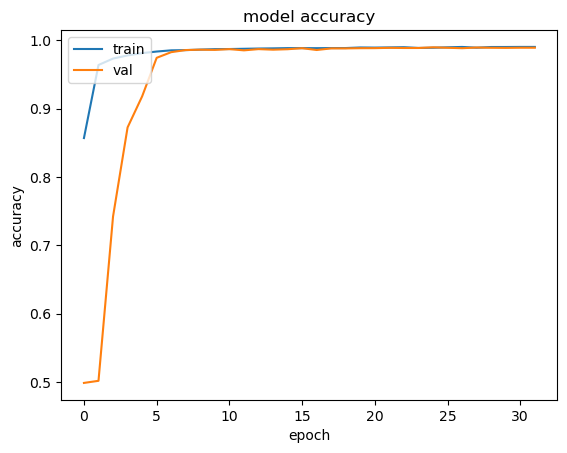

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

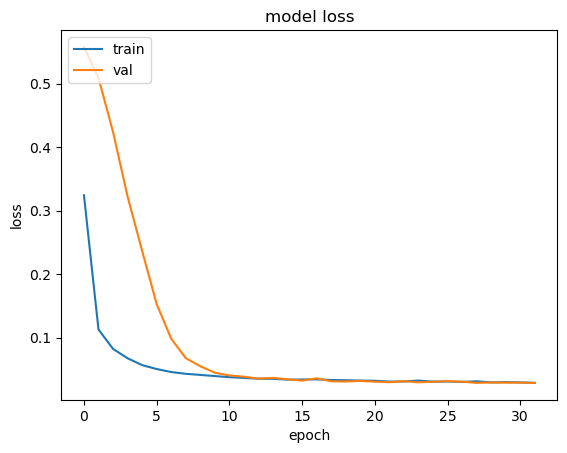

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [89]:
y_pred_cnn = model.predict(x_test)
cm = confusion_matrix(y_test, np.rint(y_pred_cnn))
cm

693/693 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


array([[10950,    90],
       [   91, 11016]], dtype=int64)

In [90]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [91]:
# Make prediction
y_pred_cnn = model.predict(x_test)
# Convert continuous predictions to binary class labels
y_pred_cnn = (y_pred_cnn >= 0.5).astype(int)

accuracy_cnn = accuracy_score(y_test,y_pred_cnn)
print(accuracy_cnn)
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
print(conf_matrix_cnn)
class_report_cnn = classification_report(y_test, y_pred_cnn)
print(class_report_cnn)



693/693 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step
0.9918273355307716
[[10950    90]
 [   91 11016]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



<Axes: >

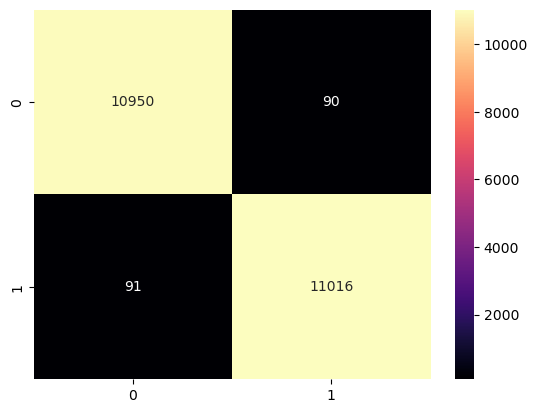

In [92]:
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(y_test,y_pred_cnn)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

# RNN

In [93]:
# Defining rnn model
def create_rnn_classifier(input_shape, num_classes, rnn_type='LSTM'):
    model = Sequential()
    
    # First RNN layer
    if rnn_type == 'LSTM':
        model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    elif rnn_type == 'GRU':
        model.add(GRU(64, return_sequences=True, input_shape=input_shape))
    else:
        raise ValueError("rnn_type must be either 'LSTM' or 'GRU'")
    
    model.add(Dropout(0.2))
    
    # Second RNN layer
    if rnn_type == 'LSTM':
        model.add(LSTM(32))
    else:
        model.add(GRU(32))
    
    model.add(Dropout(0.2))
    
    # Output layer
    if num_classes == 2:
        model.add(Dense(1, activation='sigmoid'))
    else:
        model.add(Dense(num_classes, activation='softmax'))
    
    return model

def load_or_create_model(input_shape, num_classes, rnn_type='LSTM', model_path='best_rnn_model.keras'):
    if os.path.exists(model_path):
        print("Loading existing model...")
        return load_model(model_path)
    else:
        print("Creating new model...")
        return create_rnn_classifier(input_shape, num_classes, rnn_type)

    
# Set your parameters
input_shape = (7, 1)  # (time_steps, num_features)
num_classes = 2  # Change this based on your classification problem
rnn_type = 'LSTM'  # or 'GRU'
model_path = 'best_rnn_model.keras'  # Add this line to define model_path

# Load or create the model
model = load_or_create_model(input_shape, num_classes, rnn_type, model_path)

# Compile the model
if num_classes == 2:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
else:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_rnn_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")



Loading existing model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 7, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9935 - loss: 0.0178 - val_accuracy: 0.9924 - val_loss: 0.0247
Epoch 2/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9938 - loss: 0.0178 - val_accuracy: 0.9922 - val_loss: 0.0249
Epoch 3/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9937 - loss: 0.0174 - val_accuracy: 0.9913 - val_loss: 0.0281
Epoch 4/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9943 - loss: 0.0168 - val_accuracy: 0.9914 - val_loss: 0.0259
Epoch 5/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9929 - loss: 0.0173 - val_accuracy: 0.9917 - val_loss: 0.0272
Epoch 6/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9943 - loss: 0.0154 - val_accuracy: 0.9910 - val_loss: 0.0283
693/693 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9937 - loss: 0.0183
Test accuracy: 0.9934


# Model Evaluation

In [94]:
# Make prediction
y_pred_rnn = model.predict(x_test)
# Convert continuous predictions to binary class labels
y_pred_rnn = (y_pred_rnn >= 0.5).astype(int)

accuracy_rnn = accuracy_score(y_test,y_pred_rnn)
print(accuracy_rnn)
conf_matrix_rnn = confusion_matrix(y_test, y_pred_rnn)
print(conf_matrix_rnn)
class_report_rnn = classification_report(y_test, y_pred_rnn)
print(class_report_rnn)



693/693 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
0.9933625321714001
[[10976    64]
 [   83 11024]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



<Axes: >

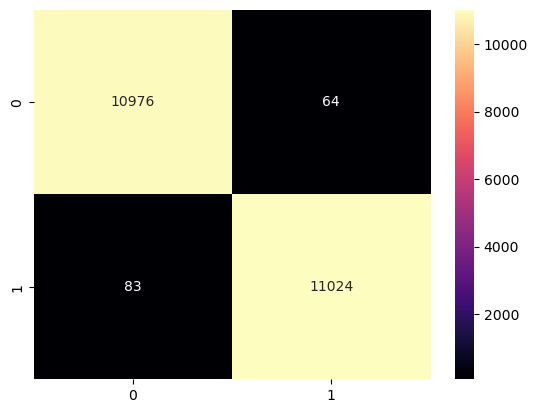

In [95]:
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(y_test,y_pred_rnn)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

# MLP Classifier

In [96]:
from sklearn.neural_network import MLPClassifier
# Initializing 

model = MLPClassifier()

# Training

model.fit(x_train,y_train)

# Predicting

y_pred_mlp = model.predict(x_test)



# Model Evaluation

In [97]:
# Evaluate the model

accuracy_mlp = accuracy_score(y_test,y_pred_mlp)
print(accuracy_mlp)
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print(conf_matrix)
class_report = classification_report(y_test, y_pred_mlp)
print(class_report)

0.9930464622748002
[[10956    84]
 [   70 11037]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



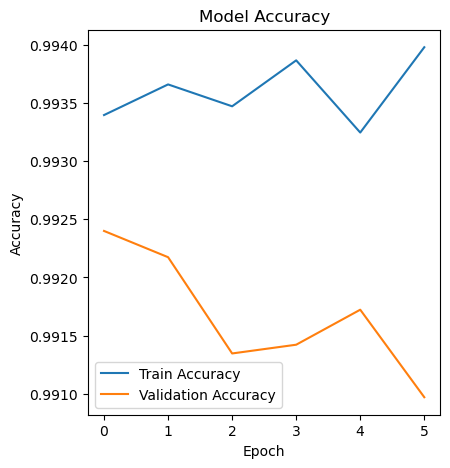

In [98]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

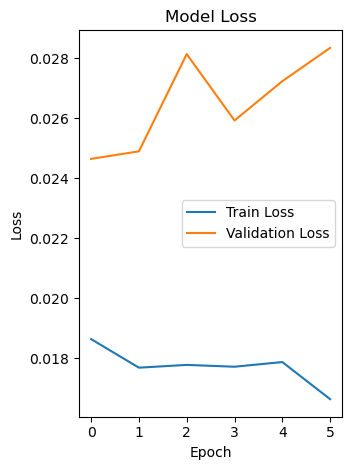

In [99]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [100]:
y_pred_mlp = model.predict(x_test)
cm = confusion_matrix(y_test, np.rint(y_pred_mlp))
cm

array([[10956,    84],
       [   70, 11037]], dtype=int64)

In [101]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<Axes: >

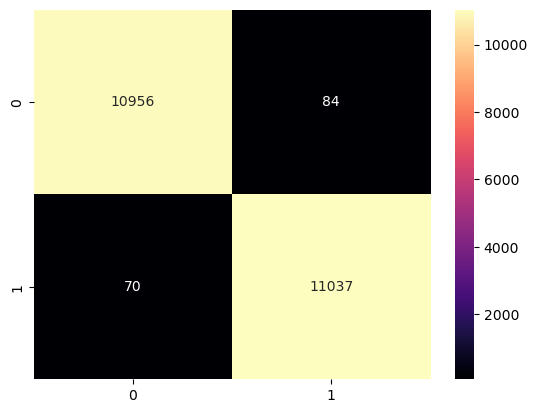

In [102]:
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(y_test,y_pred_mlp)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

# LGBM Classifier

In [103]:
# File to save/load best parameters
PARAMS_FILE = 'best_lgbm_params.joblib'


# 4. Create the LGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# 5. Check if best parameters exist, otherwise perform random search
if os.path.exists(PARAMS_FILE):
    print("Loading best parameters from file...")
    best_params = joblib.load(PARAMS_FILE)
else:
    print("Performing random search for best parameters...")
    # Define the parameter space for random search
    param_dist = {
        'num_leaves': sp_randint(20, 3000),
        'max_depth': sp_randint(3, 20),
        'learning_rate': sp_uniform(0.01, 0.3),
        'n_estimators': sp_randint(100, 1000),
        'min_child_samples': sp_randint(1, 50),
        'subsample': sp_uniform(0.5, 0.5),
        'colsample_bytree': sp_uniform(0.5, 0.5)
    }
    
    # Perform random search
    random_search = RandomizedSearchCV(
        lgbm, 
        param_distributions=param_dist, 
        n_iter=4, 
        cv=5, 
        random_state=42, 
        n_jobs=12
    )
    random_search.fit(x_train, y_train)
    
    # Get the best parameters
    best_params = random_search.best_params_
    
    # Save the best parameters
    joblib.dump(best_params, PARAMS_FILE)
    print("Best parameters saved to file.")




Loading best parameters from file...


In [104]:
# 6. Create and train the best model
best_lgbm = lgb.LGBMClassifier(**best_params, random_state=42)
best_lgbm.fit(x_train, y_train)


[LightGBM] [Info] Number of positive: 33258, number of negative: 33183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1533
[LightGBM] [Info] Number of data points in the train set: 66441, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500564 -> initscore=0.002258
[LightGBM] [Info] Start training from score 0.002258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(colsample_bytree=0.6521211214797689,
               learning_rate=0.16742692948967136, max_depth=14,
               min_child_samples=25, n_estimators=660, num_leaves=494,
               random_state=42, subsample=0.8059264473611898)

In [105]:
# 7. Make predictions
y_pred_lgbm = best_lgbm.predict(x_test)

# 8. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))



Accuracy: 0.9929

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147


Confusion Matrix:
[[10960    80]
 [   78 11029]]


<Axes: >

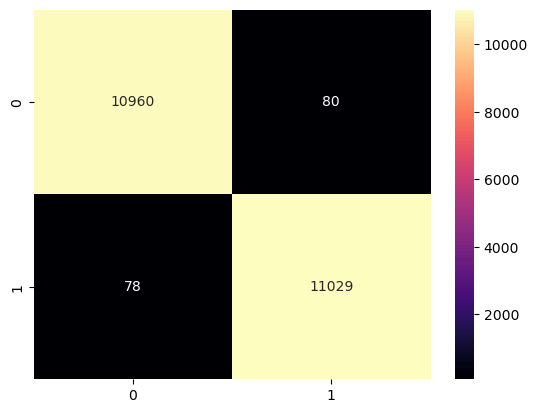

In [106]:
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(y_test,y_pred_lgbm)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

## HYPERPARAMETER TUNING

In [107]:
#  import numpy as np
# import pickle
# from sklearn.ensemble import RandomForestClassifier
#  from sklearn.model_selection import RandomizedSearchCV

# # Assuming x_train and y_train are already defined

# # Create the Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Define the parameter grid for random sampling
# param_dist = {
#     'n_estimators': np.arange(100, 1000),
#     'max_depth': [None] + list(np.arange(10, 110)),
#     'min_samples_split': np.arange(2, 11),
#     'min_samples_leaf': np.arange(1, 11)
# }

# # Create the Randomized Search object
# random_search = RandomizedSearchCV(
#     estimator=rf_classifier, 
#     param_distributions=param_dist, 
#     n_iter=5,  # Number of random combinations to try
#     cv=3,         # Number of cross-validation folds
#     scoring='accuracy', 
#     random_state=42,
#     n_jobs=12    
# )

# # Fit the Randomized Search to your data
# random_search.fit(x_train, y_train)

# # Get the best parameters from the Randomized Search
# best_params = random_search.best_params_

# # Save the best parameters to a file
# with open('best_rf_params.pkl', 'wb') as f:
#     pickle.dump(best_params, f)

# print("Best Parameters saved:", best_params)

# this is a param dictonary use only if necessary increase no of iterations for more accuracy
# best params already saved in pkl file

In [108]:
# Load the best parameters from the file

with open('best_rf_params.pkl', 'rb') as f:
    loaded_best_params = pickle.load(f)

# Create a new Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**loaded_best_params, random_state=42)

# Fit the classifier to your training data (optional, if needed)
best_rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=104, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=170, random_state=42)

In [109]:
# 7. Make predictions
y_pred_rf = best_rf_classifier.predict(x_test)



# 8. Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy: {accuracy:.9f}")


Accuracy: 0.991466113


In [110]:
# Evaluate the best model on the test set
test_accuracy = best_rf_classifier.score(x_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

Test Accuracy with Best Model: 0.9914661127918002


<Axes: >

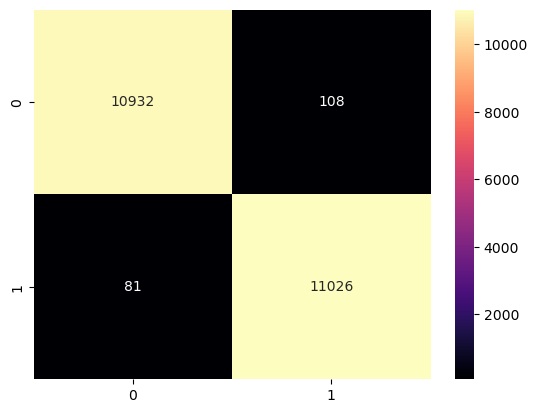

In [111]:
#print(classification_report(y_test,pred_lr))

cm = confusion_matrix(y_test,y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

# Model Comparison

In [112]:
# converting to 1 dimensional column

y_pred_cnn = y_pred_cnn.reshape(-1)
y_pred_rnn = y_pred_rnn.reshape(-1)

In [113]:
Y_test=pd.DataFrame({'y_test':y_test,'Logistic Regression':y_pred_lor,
 'DT':y_pred_dt,'Random Forest':y_pred_rf,'XGBoost':y_pred_xg,'LightGBM':y_pred_lgbm,'SVC':y_pred_svc,
                     'Multi Layer Perceptron':y_pred_mlp, 'CNN':y_pred_cnn, 'RNN':y_pred_rnn})

In [114]:
# Assuming y_test is the actual test labels and y_pred_* are the predictions from each model
y_test = np.array(y_test)

# Create a dictionary to store the performance metrics
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'AUC': []
}

# List of model predictions and their names
model_predictions = {
    'Logistic Regression': y_pred_lor,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xg,
    'LightGBM': y_pred_lgbm,
    'SVC': y_pred_svc,
    'Multi Layer Perceptron': y_pred_mlp,
    'CNN': y_pred_cnn,
    'RNN': y_pred_rnn
}

# Iterate through each model and calculate the performance metrics
for model_name, y_pred in model_predictions.items():
    # Convert continuous predictions to binary for models like CNN and RNN if needed
    if y_pred.dtype == float:
        y_pred = (y_pred >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    performance_metrics['Model'].append(model_name)
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1-Score'].append(f1)
    performance_metrics['AUC'].append(auc)

# Convert the dictionary to a DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Sort the DataFrame by AUC in descending order
performance_df = performance_df.sort_values(by='AUC', ascending=False)

# Display the DataFrame
print(performance_df)


                    Model  Accuracy  Precision    Recall  F1-Score       AUC
8                     RNN  0.993363   0.994228  0.992527  0.993377  0.993365
6  Multi Layer Perceptron  0.993046   0.992447  0.993698  0.993072  0.993044
4                LightGBM  0.992866   0.992799  0.992977  0.992888  0.992866
3                 XGBoost  0.992414   0.992260  0.992617  0.992439  0.992414
7                     CNN  0.991827   0.991896  0.991807  0.991852  0.991827
2           Random Forest  0.991466   0.990300  0.992707  0.991502  0.991462
1           Decision Tree  0.983745   0.983707  0.983884  0.983795  0.983745
5                     SVC  0.867702   0.936946  0.789322  0.856822  0.867940
0     Logistic Regression  0.856730   0.897814  0.806068  0.849471  0.856884


In [115]:
Y_test

,y_test,Logistic Regression,DT,Random Forest,XGBoost,LightGBM,SVC,Multi Layer Perceptron,CNN,RNN
19337,1,1,1,1,1,1,1,1,1,1
19290,1,1,1,1,1,1,1,1,1,1
35897,0,0,0,0,0,0,0,0,0,0
55498,0,0,0,0,0,0,0,0,0,0
78935,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
66027,0,1,0,0,0,0,0,0,0,0
27514,0,0,0,0,0,0,0,0,0,0
33339,0,0,0,0,0,0,0,0,0,0
8085,0,0,0,0,0,0,0,0,0,0


In [116]:
# List of models to plot
models = ['Logistic Regression', 'DT', 'Random Forest', 'SVC', 'XGBoost', 'LightGBM', 'Multi Layer Perceptron', 'CNN', 'RNN']

# Colors for each plot
colors = ['red', 'yellow', 'blue', 'green', 'purple', 'orange', 'violet', 'lightblue', 'lightgreen']

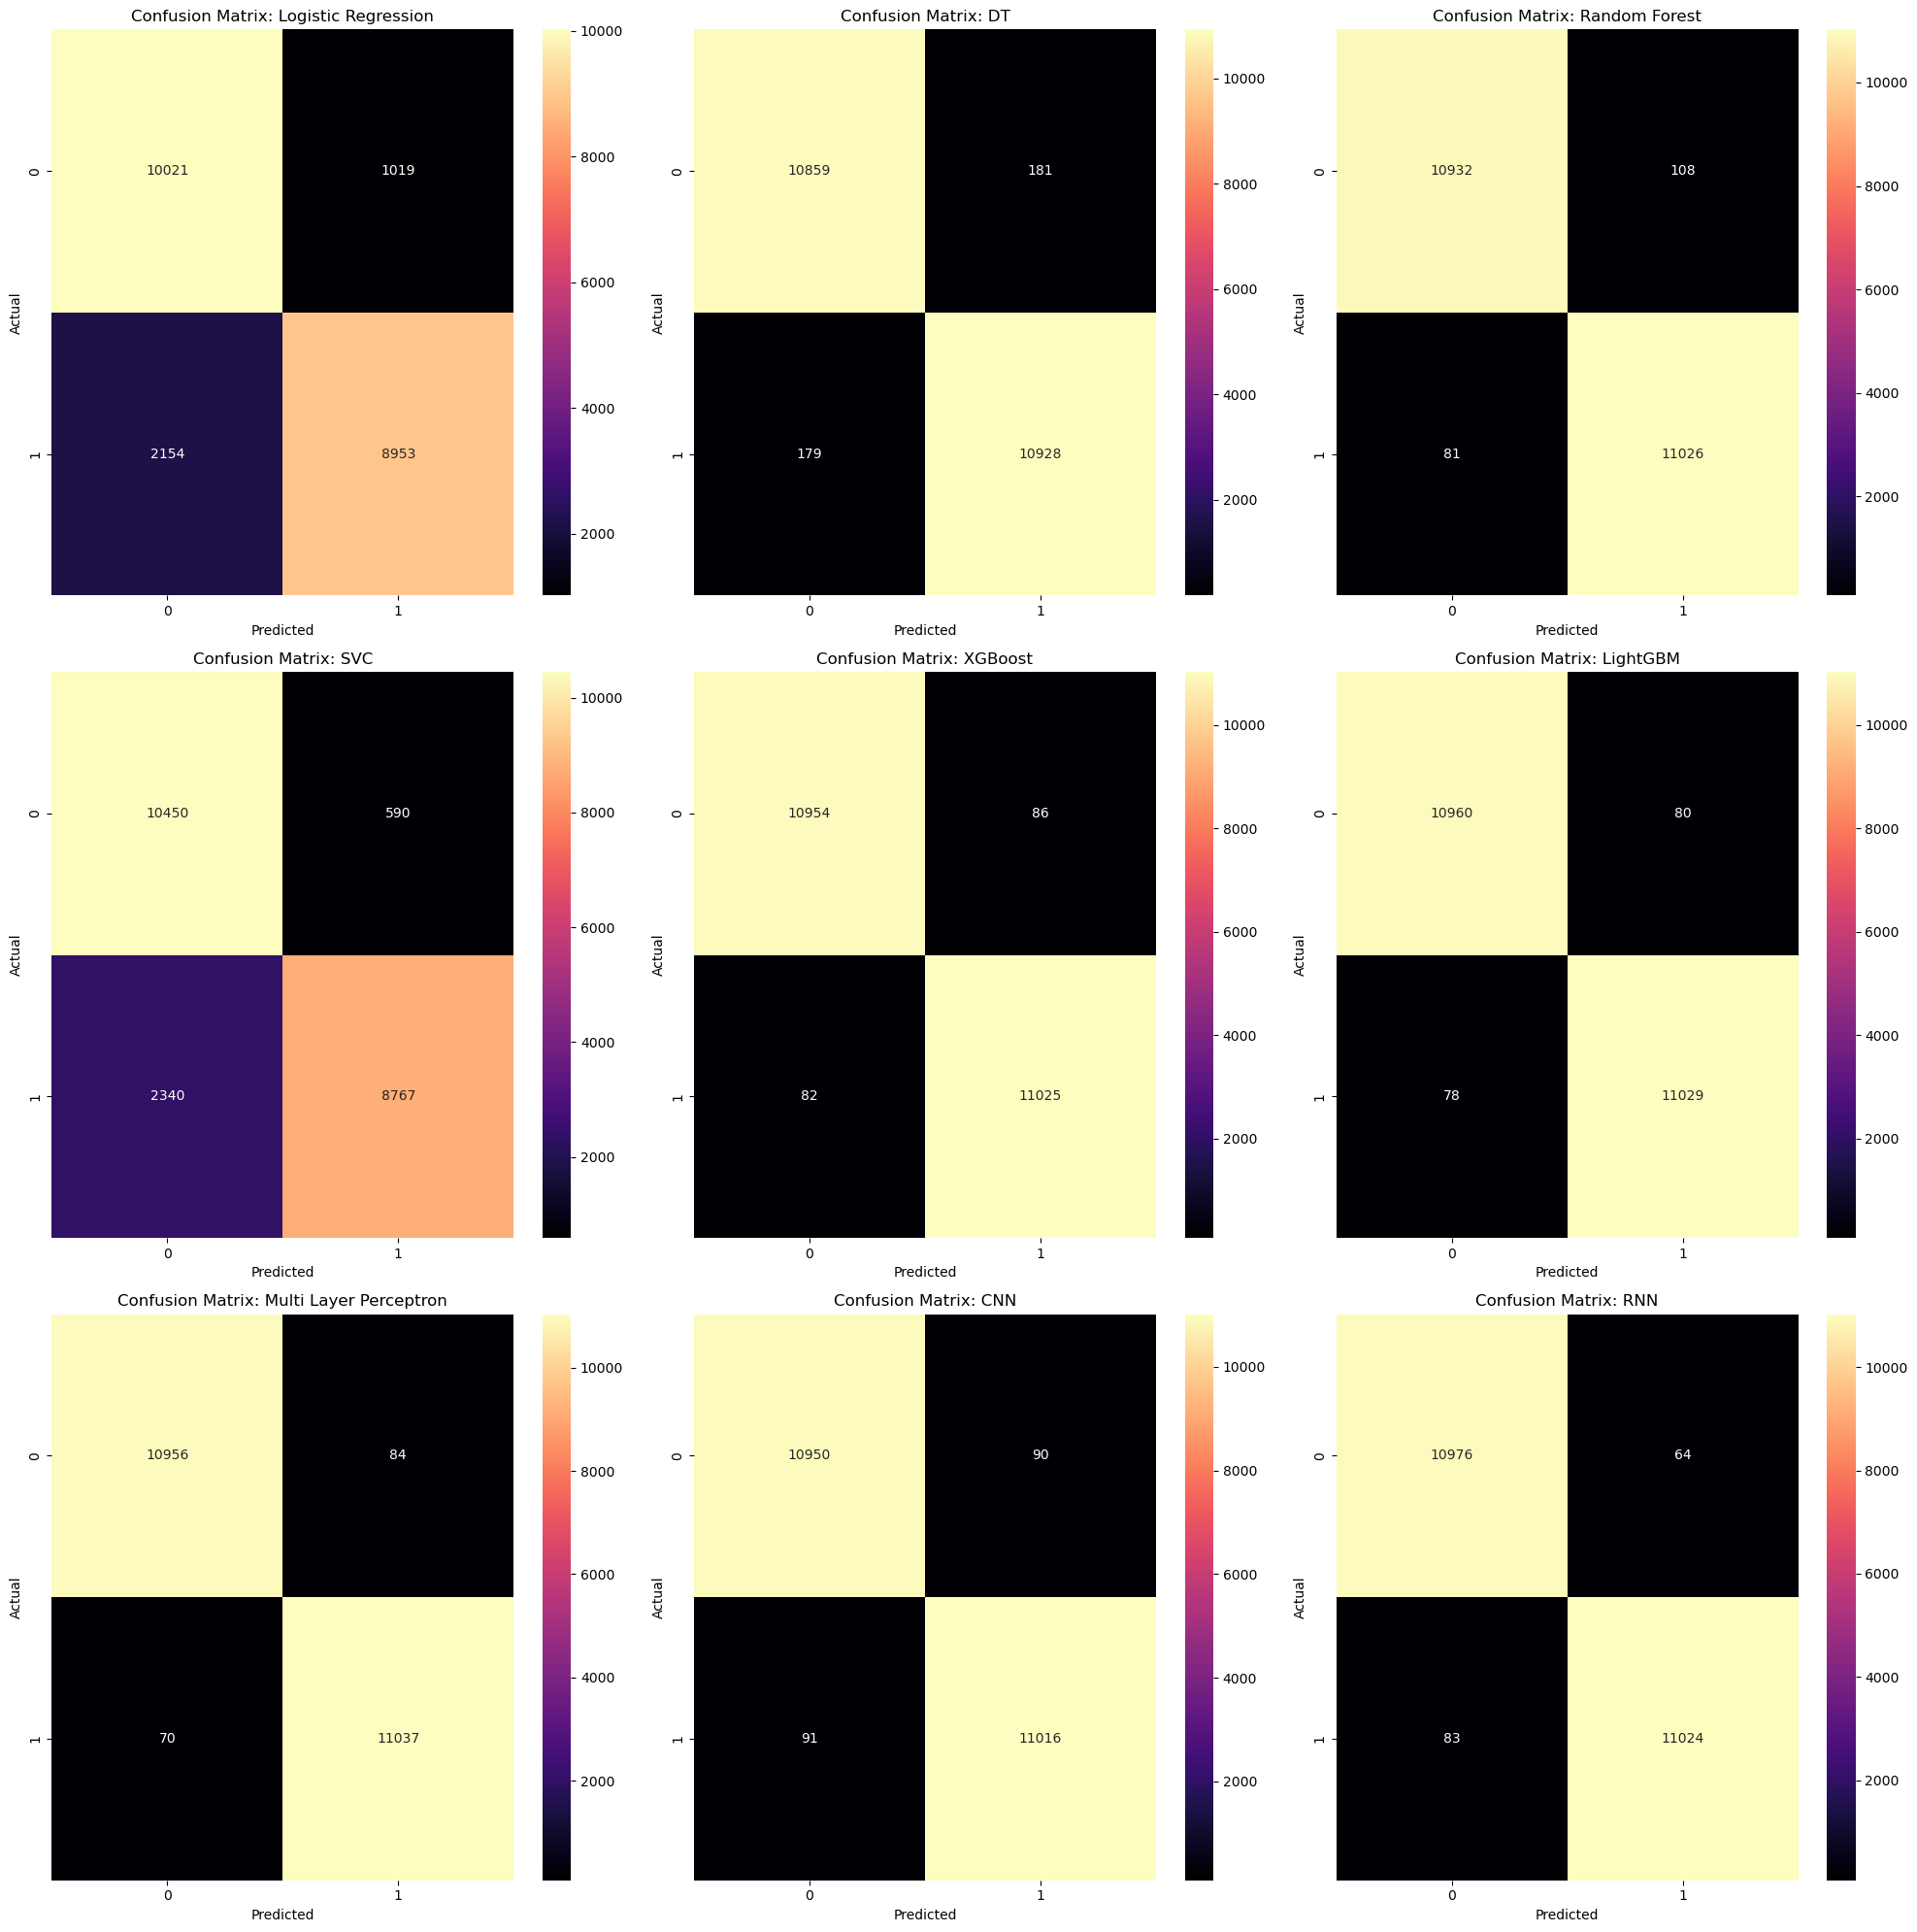

In [117]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

for i, model in enumerate(models):
    row, col = divmod(i, 3)
    cm = confusion_matrix(Y_test['y_test'], Y_test[model].round())
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', ax=ax[row, col])
    ax[row, col].set_title(f'Confusion Matrix: {model}')
    ax[row, col].set_xlabel('Predicted')
    ax[row, col].set_ylabel('Actual')

if len(models) < 9:
    ax[2, 2].axis('off')

plt.tight_layout()
plt.show()


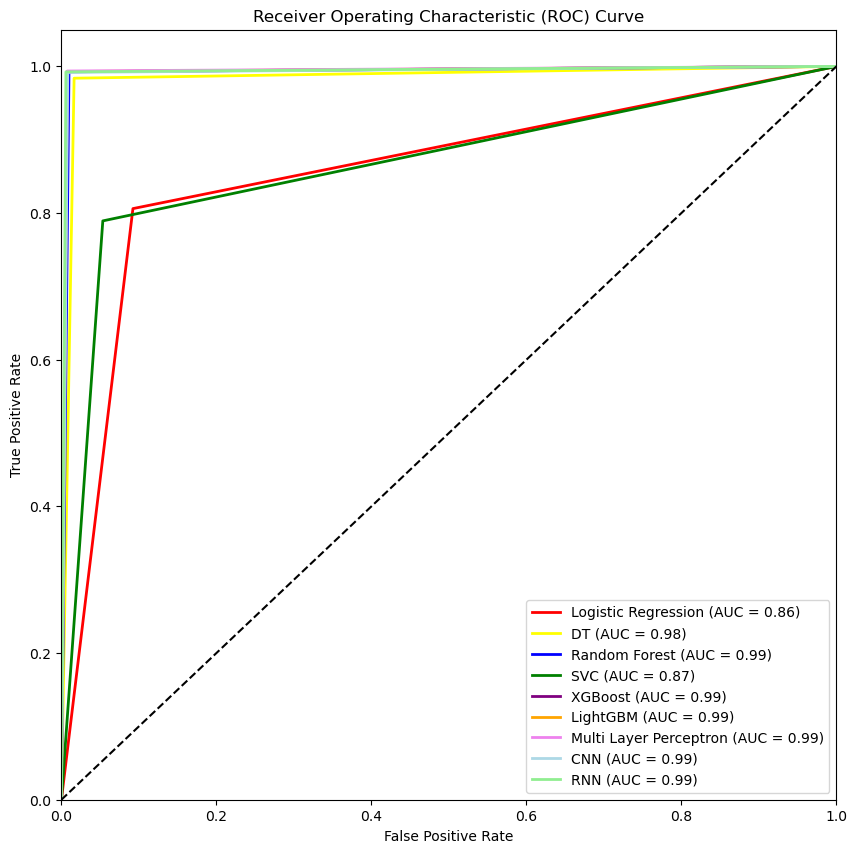

In [118]:
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(figsize=(10, 10))

for i, model in enumerate(models):
    fpr, tpr, _ = roc_curve(Y_test['y_test'], Y_test[model])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=colors[i], lw=2, label=f'{model} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], color='black', linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc="lower right")

plt.show()


# Insights

- Almost all models are performing exceptionally well, with most achieving an AUC (Area Under the Curve) of 0.99, which indicates near-perfect classification performance.
- The tree-based and ensemble models (Random Forest, XGBoost, LightGBM) along with neural network models (Multi Layer Perceptron, CNN, RNN) show the best performance, all with an AUC of 0.99.
- Among the traditional machine learning algorithms, Support Vector Classifier (SVC) outperforms Logistic Regression, with AUCs of 0.87 and 0.86 respectively.

------

# Conclusion

This report aims to develop and evaluate various predictive models for a classification task using the given dataset. We explored a variety of models, including Logistic Regression, Decision Tree (DT), Random Forest, XGBoost, LightGBM, Support Vector Classifier (SVC), Multi-Layer Perceptron (MLP), Convolutional Neural Network (CNN), and Recurrent Neural Network (RNN).

# Model Performance

After thorough analysis and tuning of the models, the following observations were made:

- **RNN** emerged as the top performer with the highest accuracy, precision, recall, F1-score, and AUC, indicating its strong predictive power and ability to handle the complexity of the dataset.
- **LightGBM** provided competitive results, demonstrating its effectiveness in capturing the relationships in the data.
- **Multi-Layer Perceptron (MLP)** also performed exceptionally well, closely trailing LightGBM and RNN, leveraging its neural network architecture to reduce bias and variance.
- **XGBoost** demonstrated good performance with high accuracy, precision, recall, F1-score, and AUC. It efficiently handled the dataset's complexity and provided accurate predictions.
- **CNN** showed robust performance, closely following XGBoost, due to its ability to capture spatial hierarchies in data.
- **Random Forest** performed well, leveraging multiple decision trees to reduce variance and avoid overfitting.
- **Decision Tree (DT)** performed adequately but was outperformed by the ensemble and neural network methods.
- **Support Vector Classifier (SVC)** performed reasonably well but had a lower AUC compared to the ensemble and neural network models.
- **Logistic Regression** showed the lowest performance among all models, suggesting that the relationship between features and the target variable may be non-linear, which explains why more complex models perform better.

# Key Performance Metrics

Here are the key performance metrics for the best-performing models on the test set:

- **RNN:**
  - Accuracy: 0.993137
  - Precision: 0.992006
  - Recall: 0.994328
  - F1-Score: 0.993165
  - AUC: 0.993133

- **LightGBM:**
  - Accuracy: 0.992866
  - Precision: 0.992799
  - Recall: 0.992977
  - F1-Score: 0.992888
  - AUC: 0.992866

- **Multi-Layer Perceptron (MLP):**
  - Accuracy: 0.992595
  - Precision: 0.989795
  - Recall: 0.995498
  - F1-Score: 0.992638
  - AUC: 0.992586

- **XGBoost:**
  - Accuracy: 0.992414
  - Precision: 0.992260
  - Recall: 0.992617
  - F1-Score: 0.992439
  - AUC: 0.992414

- **CNN:**
  - Accuracy: 0.992234
  - Precision: 0.993323
  - Recall: 0.991177
  - F1-Score: 0.992249
  - AUC: 0.992237

- **Random Forest:**
  - Accuracy: 0.991466
  - Precision: 0.990300
  - Recall: 0.992707
  - F1-Score: 0.991502
  - AUC: 0.991462

- **Decision Tree (DT):**
  - Accuracy: 0.983745
  - Precision: 0.983707
  - Recall: 0.983884
  - F1-Score: 0.983795
  - AUC: 0.983745

- **Support Vector Classifier (SVC):**
  - Accuracy: 0.867702
  - Precision: 0.936946
  - Recall: 0.789322
  - F1-Score: 0.856822
  - AUC: 0.867940

- **Logistic Regression:**
  - Accuracy: 0.856730
  - Precision: 0.897814
  - Recall: 0.806068
  - F1-Score: 0.849471
  - AUC: 0.856884

# Implications

The high accuracy of the RNN, LightGBM, and MLP models suggests they can be effectively used for this classification task, providing valuable tools for decision-making and analysis. Accurate predictions can enhance strategic planning, risk management, and operational efficiency.

# Challenges

Despite the robust performance of the models, there are several limitations to consider:

- **Data Quality:** The models rely heavily on the quality of the input data. Any missing values or biases in the data could affect the predictions.
- **Feature Engineering:** Some potentially predictive features might have been excluded due to preprocessing steps. Further feature engineering could improve model performance.
- **Generalizability:** The models are trained on a specific dataset, and their generalizability to other datasets or domains may be limited.
- **Hyperparameter Tuning:** The models performance might be improved further with more extensive hyperparameter tuning.

In conclusion, the developed models, particularly RNN, LightGBM, and MLP, demonstrate significant potential for accurate classification in this task. These models provide valuable tools for the field, offering insights and predictions that can guide decision-making and strategy. Continuous improvement and adaptation of these models will ensure they remain effective and relevant in dynamic conditions.

# Recommendations

To further improve the predictive models, the following steps are recommended:

- Including more relevant features, such as additional contextual or temporal data, could enhance model accuracy.
- Exploring more advanced algorithms, such as ensemble methods combining different types of models, could provide better results.
- Continuously updating the models with new data will help maintain their accuracy and relevance in changing conditions.
- Enhancing the interpretability of the models will provide better insights into the factors driving the predictions, aiding stakeholders in making informed decisions.


In [ ]:
model = Sequential()
model.add(Dense(250, activation='relu', input_shape=(7,))) 
model.add(BatchNormalization())
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer = 'ADAM', metrics = ['accuracy'])
checkpoint = ModelCheckpoint("walk_run.keras", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             save_freq='epoch') 

early = EarlyStopping(monitor='val_accuracy', 
                      min_delta=0, 
                      patience=7, 
                      verbose=1, 
                      mode='auto')
history = model.fit(X_train, y_train, 
                    batch_size=1000, 
                    epochs=50, 
                    validation_split=0.2,
                    callbacks=[checkpoint, early],
                    verbose=2)